# Manual 02: Matrices
## Universidad del Norte
### Economía Matemática
Esta es clase es referente a la parte **matricial**. Nuestro referente de insumo o la forma o manera como van los datos que usualmente utilizamos es con matrices y muchas de estas forman el desarrollo en cadena de multiples operaciones que nos llevaría tiempo hacer.

A continuación vamos a realizat un *set up* para mejorar un poco la interacción y desarrollo de estas en el ambiente de Python.

In [11]:
import numpy as np
import sympy as sy

sy.init_printing()

In [12]:
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

Vamos a importar un paquete para múltiples salidas

In [13]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"  # Multiline activo

In [14]:
def round_expr(expr, num_digits):
    return expr.xreplace({n: round(n, num_digits) for n in expr.atoms(sy.Number)})

## Matrices
Conjunto de elementos ordenados en filas(m) y columnas(n) $A_{m\times n}$. 

In [15]:
A = np.array([[1, 2, 3], [4, 6, 9], [11, 14, 21]])

In [16]:
A

array([[ 1,  2,  3],
       [ 4,  6,  9],
       [11, 14, 21]])

In [17]:
type(A)

numpy.ndarray

Podemos conocer su tamaño $m \times n$

In [18]:
A.shape

## Operación Básica
Empezamos con un grupo pequeño de cálculo de operaciones. Miraremos primero las opciones que tenemos. Definimos dos matrices de tamaño $m \times n$ y van a ser $A\;y\;B$

$$
A = \begin{pmatrix}
3 & 5 \\
9 & 8
\end{pmatrix} B = \begin{pmatrix}
0 & 1 \\
5 & 4
\end{pmatrix}
$$

In [19]:
A = np.array([[3, 5], [9, 8]])
B = np.array([[0, 1], [5, 4]])

Si por algun motivo pensamos en una suma de matrices o lo que es
$$A+B$$

In [20]:
A+B

array([[ 3,  6],
       [14, 12]])

Así mismo con la resta.

In [21]:
A-B

array([[3, 4],
       [4, 4]])

Si intentaramos hacer una operación como la multiplicación, si hay que tener cuidado. Porque cualquiera sea el caso

In [22]:
A*B

array([[ 0,  5],
       [45, 32]])

Que lo que esta haciendo viene a ser mas bien un producto a producto por orden de elemento pero no la forma o manera **Producto elemental de Hadamard**

In [23]:
A@B

array([[25, 23],
       [40, 41]])

Que no es mas que: 

$$
A = \begin{pmatrix}
3 & 5 \\
9 & 8
\end{pmatrix} B = \begin{pmatrix}
0 & 1 \\
5 & 4
\end{pmatrix}= \begin{pmatrix}
25 & 23 \\
40 & 41
\end{pmatrix} 
$$


Si queremos ver explicitamente lo anterior, una especie de paso a paso. Es tener por ejemplo:

In [24]:
np.sum(A[0, :] * B[:, 0])  # elemento de (1, 1)
np.sum(A[0, :] * B[:, 1])  # elemento de (1, 2)
np.sum(A[1, :] * B[:, 0])  # elemento de (2, 1)
np.sum(A[1, :] * B[:, 1])  # elemento de (2, 2)

25

23

40

41

Note que el indice de Python siempre empieza desde cero, Para el caso $a_{ij}=a_{11}=a_{00}$

### Ejercicio

$$\text{1. Dadas las matrices } A = \begin{pmatrix}
2 & 3 \\
4 & 5
\end{pmatrix} \text{ y } B = \begin{pmatrix}
1 & 0 \\
2 & 3
\end{pmatrix}, \text{ calcule } A + B.$$

$$\text{2. Dadas las matrices } C = \begin{pmatrix}
1 & 2 \\
3 & 4
\end{pmatrix} \text{ y } D = \begin{pmatrix}
0 & 1 \\
1 & 0
\end{pmatrix}, \text{ calcule ahora } C \times D.$$

## Algebra, matrices y notación
A continuación vamos a mirar como el paquete *Sympy* nos permite tambien realizar o hacer operaciones con (letras).

In [36]:
a, b, c, d, e, f, g, h, i, j, k, l, m, n, o, p, q, r, s, t, u, v, w, x, y, z = (
    sy.symbols(
        "a, b, c, d, e, f, g, h, i, j, k, l, m, n, o, p, q, r, s, t, u, v, w, x, y, z",
        real=True,
    )
)

Ahora veamos el truco de uso

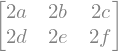

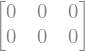

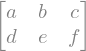

In [26]:
A = sy.Matrix([[a, b, c], [d, e, f]])
A + A
A - A
2*A-A

A continuación crearemos una matriz adicional y seguiremos desarrollando otras operaciones.

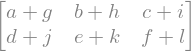

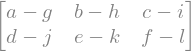

In [27]:
B = sy.Matrix([[g, h, i], [j, k, l]])
A + B
A - B

Ya claro la parte de las sumas y restas pasemos entonces a la parte del producto

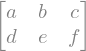

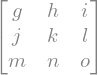

In [28]:
A = sy.Matrix([[a, b, c], [d, e, f]])
B = sy.Matrix([[g, h, i], [j, k, l], [m, n, o]])
A
B

Cuando entonces vemos que si aplicamos lo conmutable, veremos como se emplea en realidad el desarrollo de cada uno de los elementos contenidos en una matriz.

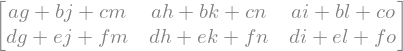

In [29]:
AB = A * B
AB

*Note adicionalmente que el producto se desarrolla tal cual es requerido por ese tipo de operación*

### Propiedades
Miremos un ejemplo mas clave. La multiplicación de matrices suele ser "no conmutable". Por ello, vamos a tomar como ejemplo

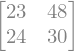

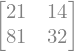

In [30]:
A = sy.Matrix([[9, 2], [3, 3]])
B = sy.Matrix([[1, 4], [7, 6]])
A * B
B * A

Siendo objetivos viene a ser algo como:

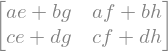

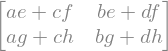

In [31]:
A = sy.Matrix([[a, b], [c, d]])
B = sy.Matrix([[e, f], [g, h]])
A * B
B * A

Para definir que $AB=BA$, habría que pensar que $AB-BA=0$

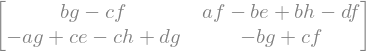

In [32]:
P = A * B - B * A
P

De lo anterior debemos llevarlo a igualar cada uno de ellos a cero. Iremos primero por filas y luego si su respectiva columna

Este sistema queda como:

$$\begin{align}
bg-cf= & 0 \\
af-bc+bh-df & 0 \\
-age+ce-ch+dg= & 0 \\
-bg+cf= & 0
\end{align}$$ 


Un primer intento es mirar la reducción por Gauss-Jordan para resolver ese sistema ecuacional

\begin{align*}
    bg - cf &= 0 \quad &\Rightarrow -cf + bg + 0e + 0h = 0 \\
    af - be + bh - df &= 0 \quad &\Rightarrow (a - d)f + 0g - be + bh = 0 \\
    -ag + ce - ch + dg &= 0 \quad &\Rightarrow 0f + (d - a)g + ce - ch = 0 \\
    -bg + cf &= 0 \quad &\Rightarrow cf - bg + 0e + 0h = 0
\end{align*}

Note que hemos organizado el <span style="color:blue">Sistema</span>. De tal manera que podamos reducirlo ordenadamente

Resolver matrices de forma aumentada no es trivial. Es bueno tener claro su montaje. Para ello mire lo siguiente:

$$\begin{equation}
\left[
\begin{array}{cccc:c}
-c & b & 0 & 0 & 0 \\
a-d & 0 & -b & b & 0 \\
0 & d-a & c & -c & 0 \\
c & -b & 0 & 0 & 0
\end{array}
\right]
\end{equation}
$$

Miremos entonces como escribirla en Python

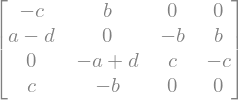

In [33]:
A_aum = sy.Matrix([[-c, b, 0, 0], [a - d, 0, -b, b], [0, d - a, c, -c], [c, -b, 0, 0]])
A_aum

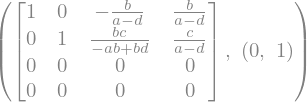

In [34]:
A_aum.rref()

#### Solución del sistema

In [35]:
import sympy as sp

# Las entradas de variables (como simbolos)
a, b, c, d = sp.symbols("a b c d")

# Siguiente matriz
e, f, g, h = sp.symbols("e f g h")

# Montaje de Matrices
A = sp.Matrix([[a, b], [c, d]])
B = sp.Matrix([[e, f], [g, h]])

# Hallamos productos
AB = A * B
BA = B * A

# Va el conjunto de ecuaciones
ecuaciones = [sp.Eq(AB[i, j], BA[i, j]) for i in range(2) for j in range(2)]

# Solve the system of equations
solucion = sp.solve(ecuaciones, (e, f, g, h))

# Print the general solutions
print("Solucion de los elementos de matriz B:")
for sol in solucion:
    print(f"{sol}: {solucion[sol]}")

# Parámetros de sustitución
# Es hora de definir c1 y c2
c1, c2 = sp.symbols("c1 c2")

# Definimos la solución
parametric_solucion = {
    e: solucion[e].subs({g: c1, h: c2}),
    f: solucion[f].subs({g: c1, h: c2}),
    g: c1,
    h: c2,
}

# Print the parameterized solution in LaTeX format
print("\nSolución Paramétrica:")
for sol in parametric_solucion:
    print(f"{sp.latex(sol)}: {sp.latex(parametric_solucion[sol])}")

Solucion de los elementos de matriz B:
e: h + g*(a - d)/c
f: b*g/c

Solución Paramétrica:
e: c_{2} + \frac{c_{1} \left(a - d\right)}{c}
f: \frac{b c_{1}}{c}
g: c_{1}
h: c_{2}


Solución Paramétrica:
$$e: c_{2} + \frac{c_{1} \left(a - d\right)}{c}
f: \frac{b c_{1}}{c}
g: c_{1}
h: c_{2}$$

--------

## Agradecimientos y créditos
Mucho de este material se desarrolló gracias a los recursos construidos por el Profesor 
**Weijie Chen** y el Doctor **Div Baghia** de California State University. © *Todos los derechos reservados* 
